# Unsupervised Learning

# 1.K_MEANS

In [1]:
!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/USArrests.csv", index_col =0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Buradaki segmentasyon probleminde birden fazla değişken var. ve bu bir müşteri verisi değil. burada rfm, cltv gibi metrikler üzerinden sınıflandırma yapamayız. burada daha farklı numerik metrikler açısından bir clustering (kümeleme) yapmaya ihtiyacımız var.

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [8]:
#uzaklık temelli bir yöntem kullanacağız. 
#uzaklık temelli yöntemlerde değişkenlerin standartlaştırılması çok önemlidir.

sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)  #fit ettiğim için nparray olarak döndü
df[0:5]

#burada 4 değişken olduğu için dataframe oluşturup değişken isimlerini atamadım.

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [2]:
#bağımsız (gözetimsiz) öğrenme yöntemlerinde kmeans kullanıyorum.
#bağımsız öğrenme yöntemi bu bağımlı değişken yoktur.

kmeans = KMeans(n_clusters=4, random_state=17).fit(df)
kmeans.get_params()

NameError: name 'KMeans' is not defined

- 'n_clusters'--> 4, dışarıdan ayarlanması gereken önemli bir parametredir.
-  'max_iter'--> 300, belirli bir iterasyon adedince bu kümelere girme çıkma, merkez hesaplamalarının devam etmesi.
 


In [10]:
#4 küme varmış. bunun sayısına biz karar vermeliyiz.
kmeans.n_clusters


4

In [11]:
#clusterların merkezleri
kmeans.cluster_centers_


array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [12]:
#küme etiketleri. burada 0 dan 3 e kadar 4 etiket var.
#0 ilk kümeyi. 3 son kümeyi ifade etmektedir.
kmeans.labels_


array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [13]:
#inetria_ --> sse değeridir. gözlem birimlerinin some of square distances değeridir.
#yani en yakın clustera olan uzaklıkları verir.
kmeans.inertia_

3.683456153585913

In [14]:
#boş bir Kmeans() nesnesi oluşturulur.
kmeans = KMeans()

In [15]:
#boş bir liste oluşturulur.
ssd = []

In [16]:
#1 den 30 a kadar K lar oluşturulur.
K = range(1, 30)

In [17]:

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)  #inertia değerlerini ssd nin içerisine gönderiyor olacak.

C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [18]:
ssd

[13.184122550256443,
 6.5968938679461955,
 5.01849999148911,
 3.683456153585913,
 3.1831577316766535,
 2.903858752759793,
 2.599326768645046,
 2.3406610620028525,
 2.030477331097691,
 1.869990676714817,
 1.6703055582237822,
 1.5553182501370746,
 1.4649827301644383,
 1.2864877871756228,
 1.1764723280179172,
 1.1285074682703364,
 1.0494690709699364,
 0.9432640465647979,
 0.9289256558785628,
 0.8546000213277178,
 0.7671533810940632,
 0.7525924164536798,
 0.6974217600886614,
 0.627060478204581,
 0.5861134357054881,
 0.5144649644867211,
 0.49575482224897627,
 0.46258180629827333,
 0.4008530111443834]

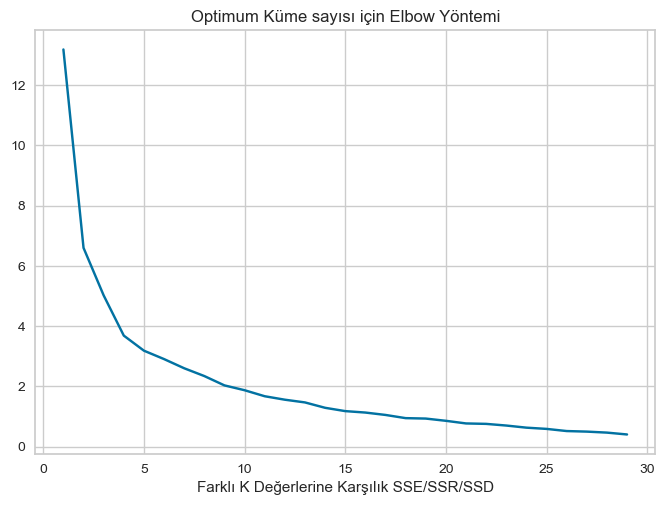

In [19]:
#grafikte küme sayısı arttıkça sse değerlerinin (hatanın) azaldığı görülmektedir. zaten normalde de durum böyle beklenir.
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

grafikte karar vermek için eğimin en şiddetli olduğu noktalar seçilir.
burada eğimin en şiddetli olduğu yer K=5 değerinde dirsekleme (elbow) en fazla. 
bu nedenle büyük ihtimalle k=5 seçilirdi. ama burada bunu seçmek zor. bu işlemin daha otamatik bir yolu var.
o da ELBOW YÖNTEMİ dir.

C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

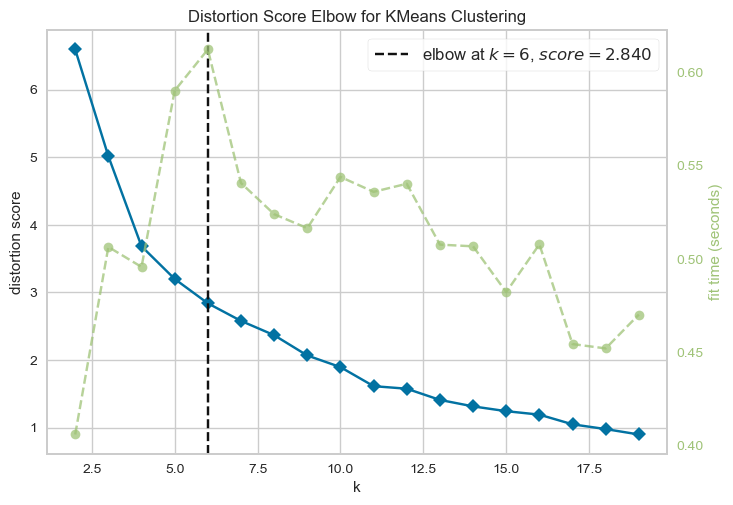

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
#Elbow Yöntemi (Dirsel Yöntemi)
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [21]:
#optimum değer:
elbow.elbow_value_


6

In [22]:
# Final Cluster'ların Oluşturulması


In [23]:
#modeli kur
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

#modelin içinden alabileceklerin
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
df[0:5]

C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\esman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [24]:
#modelin içinden alabileceklerin
kmeans.n_clusters  #cluster sayısı


6

In [25]:
kmeans.cluster_centers_  #clusterların merkezleri


array([[0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.22289157, 0.27853881, 0.87288136, 0.23169681],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658],
       [0.13143483, 0.09806974, 0.32511556, 0.10617806],
       [0.36187608, 0.34564579, 0.5653753 , 0.33444075]])

In [26]:
kmeans.labels_   #labels
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [27]:
# hangi eyalet hangi clusterda???? Gözlem birimlerinin isimleri yok. 
#hem de hangi gözlem birimi hangi cluster içinde yer alıyor??

clusters_kmeans = kmeans.labels_

In [28]:
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/USArrests.csv", index_col =0)


In [29]:
#bu df yeni bir değişken ekle
df["cluster"] = clusters_kmeans
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,3


In [30]:
# cluster sütünunde 0 diye bir isimlendirme istemiyorsan 1 ile topla böylece cluster atamaların 1 den başlar.
#böylece 1 den 5 e kadar toplam 5 küme cluster vardır.
df["cluster"] = df["cluster"] + 1


In [31]:
# 1numaralı cluster da kimler var. merak ediyorum.
df[df["cluster"]==1]


,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,1


In [32]:
# 1numaralı cluster da kimler var. merak ediyorum.
df[df["cluster"]==1]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,1


In [33]:
#count--> bir cluseter da ilgili değişkenler açısından toplam sayı
#mean -->bir cluseter da ilgili değişkenlerin ortalaması
#median -->bir cluseter da ilgili değişkenlerin medyanı

df.groupby("cluster").agg(["count","mean","median"])


Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            1  10.000000   10.0       1  263.000000  263.0        1   
2            6   4.500000    3.9       6  126.333333  134.5        6   
3            7  14.671429   14.4       7  251.285714  249.0        7   
4           11  11.054545   11.3      11  264.090909  255.0       11   
5           11   2.981818    2.6      11   73.636364   72.0       11   
6           14   6.807143    6.7      14  145.928571  148.0       14   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        48.000000   48.0     1  44.500000  44.50  
2        83.500000   84.0     6  16.266667  17.55  
3        54.285714   58.0     7  21.685714  22.20  
4        79.090909   80.0    11  32.618182  31.90  
5        51.181818   53.0    11  11.409091  11.20  
6        65.357143   66.5    14  20.242857  19.75

In [34]:
#kümelere göre ilgili değerlendirmeler yapılığ ilgili kişiiye bu dosyalar gönderebilir.
df.to_csv("clusters.csv")


# 2. Hiyerarşik Kümeleme ( Hierarchical Cluster )

In [35]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


In [36]:
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/USArrests.csv", index_col =0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [37]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)  #fit ettiğim için nparray olarak döndü
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [38]:
#bölümleyici birleştirici yöntemlerden biri LİNKAGE YÖNTEMİ.
hc_average = linkage(df, "average")


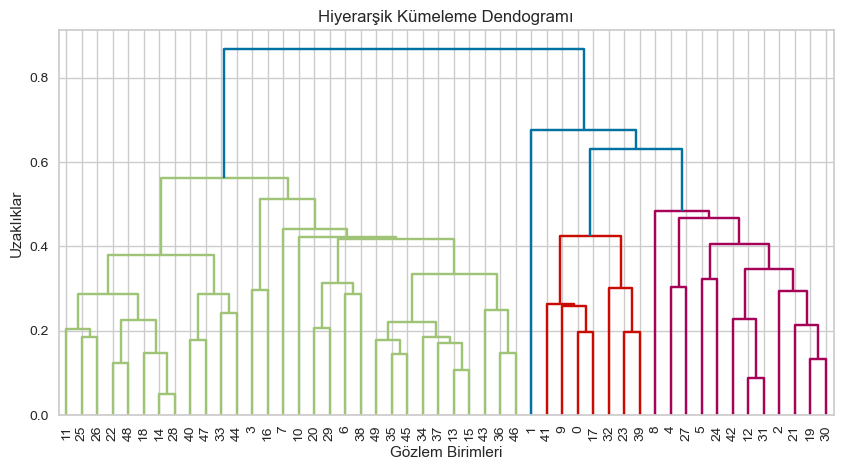

In [39]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()


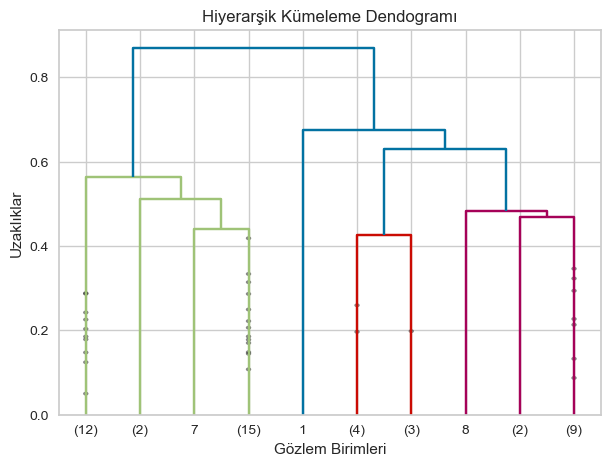

In [40]:
#daha az sayıda kümeleme istiyorsam: lastp kullan.
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

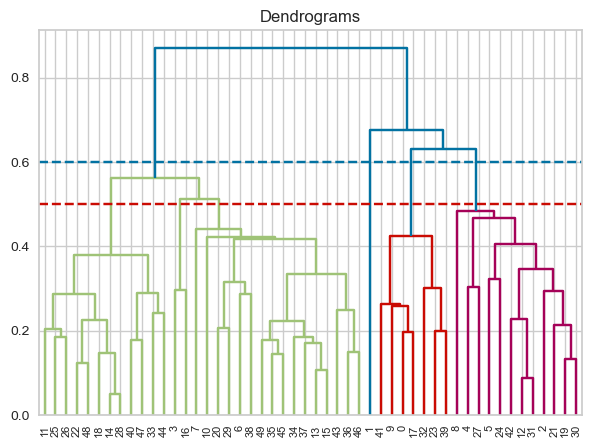

In [41]:
#Küme Sayısını Belirlemek
# tek çizgide atabilirsin birden fazlada atabilirsin. birden fazla atacağın zaman rengini değiştir.
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)  #dendogramı atıyorum ki ilerde kullanıcam.
plt.axhline(y=0.5, color='r', linestyle='--') #y ekseninde belirli bir değere göe çizgi at.
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()


In [42]:
#küme sayısına karar verdikten sonra sıra geldi final modele. hangi gözlem birinin hangi sınıfta olacağı bilgisini vermem lazım.
# Final Modeli Oluşturmak
from sklearn.cluster import AgglomerativeClustering

In [43]:
#biz average yöntemine göre yaptık. bu nedenle linkage kısmına average yazıılır. diğer yöntemleri görmek için dokümantasyona git.
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")


In [44]:
#5 clusters için bilgiler gelir.
clusters = cluster.fit_predict(df)

In [45]:
#veri setini baştan oku ve veri setinin içine clusters ekle.
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/USArrests.csv", index_col=0)
df["hi_cluster_no"] = clusters
df

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3


In [46]:
#0 dan başlamasın diye 1 ekliyorum.
df["hi_cluster_no"] = df["hi_cluster_no"] + 1
df

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,4


In [47]:
df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1


KeyError: 'kmeans_cluster_no'

In [ ]:
df["kmeans_cluster_no"] = clusters_kmeans


Böylece her iki yöntemlede eyaletleri clusters ayırma işlemini görmüş olduk.


# Principal Component Analysis (PCA)


In [ ]:
#Beyzbol oyuncularının maaşlarını ve diğer bazı özellikleri barındıran veri setidir.

df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/Hitters.csv")
df.head()

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
df[num_cols].head()


In [ ]:
df = df[num_cols]


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.shape


In [ ]:
df = StandardScaler().fit_transform(df)


In [ ]:
#amacım bu çok değşkenli veriyi daha az veriyle ifade etmek.
pca = PCA()
pca_fit = pca.fit_transform(df)

In [ ]:
#pca bileşenelrinin başarısını nasıl değerlendireceğiz?
#bileşenlerin açıkladığı varyans (bilgi=varyans) oranlarına göre belirlenir.
pca.explained_variance_ratio_  # bileşenlerin açıkladıkları varyans oranı gelir.
np.cumsum(pca.explained_variance_ratio_)  #kümülatif varyansları hesaplayalım.

In [ ]:
#Optimum Başarı Sayısı
#burada çıkan grafiğe bakıp karar vereceksin. 3 bileşenle yuzde 80 ni açıklamış o zaman yeterli diyebilirsin.

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

Diyelim ki bu grafiği veri görselleştime için kullanıyoruz. o zaman 2 boyutu seçmek zorundayız.
eğer bir regresyon problemiyle ilgileniyorsak o zaman çoklu doğrusal bağlantı problemini çözmek için değişken sayısı kadar bileşen oluşturma tercih edilebilir. böylece veri setinin içindeki bilginin tamamı korunmuş olur. ama değişkenler birbirinden bağımsız olur.  yüksek korelasyona ve çoklı doğrusal bağlantı problemıne sahip olmaz.


In [ ]:
# Final PCA'in Oluşturulması
#optimum bileşen sayısı olarak 3 seçtiğimizi varsayalım. buna göre final pca modelli kuralım.
pca = PCA(n_components=3)
#bilşenleri oluşturalım
pca_fit = pca.fit_transform(df)


In [ ]:
#bileşenler tek başına veri setini açıklama oranları
pca.explained_variance_ratio_

In [ ]:
#bileşenlerin kümülatif bir şekilde veri setini açıklama oranları
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# BONUS: Principal Component Regression
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/Hitters.csv")
df.head()

In [ ]:
df.shape() #322 gözlem birimim var. bunda daha fazla değişken var.

In [ ]:
len(pca_fit) #322 gözlem birimi vardı. ama bunda 3 bileşen var.

In [ ]:
#nümerik kolonları seç
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]


In [ ]:
#kaç tane nümerik kolon var buna bak. 
len(num_cols)  #16 tane varmış bız bunu 3 e indirgemiştik.


In [ ]:
#numcols dışında kalan değişkenleri tutmak için others oluşturuyorum.
others = [col for col in df.columns if col not in num_cols]


In [ ]:
#bileşenlerin isimlerindirmesini yap ve dataframe çeviiryorum, okunabilirlik açsından.
pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()


In [ ]:
df[others].head()


benim daha öncesinde 16 adet sayısal değikenim vardı. ben bunları 3 e indirgedim. aynı zamanda sayısal olmayan başka ketegorik değişkenlerimde var. ne yapıcaz?
pcr = makine öğrenmesi yöntemi =temel bileşen regresyonu


In [ ]:
#iki df girilir ve concat methoduyla birleştirilir.
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)
final_df.head()

In [ ]:
#artık modelimizi kuracağız bunun için import işlemlerini gerçekleştirelim
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV


In [ ]:
#model kuracağım ancak kategorik değişkenlerde bir sorun var. 
#cat_cols sınıf sayısı 2 old için label encoder uygulayabilirim.ya da get dummıes ya da one hot encoder (dropfirst true dersen)kullanabiliriz.
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

In [ ]:
#final df bir bakalım ne durumda
final_df.head()

In [ ]:
#Veri setindeki NaN olan değerleri direkt uçurmak istiyorum.
final_df.dropna(inplace=True)

In [ ]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [ ]:
lm = LinearRegression()
#5 katlı çapraz doğrulama ile doğruluğunu test et. hatasına bak --> 345.602
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
y.mean() #-->354.92

In [ ]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))
#398.25 çıktı regresyondan daha kötü bu model.

In [ ]:
#Hiperparametre Optimizasyonu
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}


In [ ]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))


In [ ]:
#BREAST CANCER

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)


In [ ]:
#çok değişkenli bir veri. ben bunu 2 eksende görselleştirmek istiyorum. çok fazla değişken var bunu yapmak mümkün değil.
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/breast_cancer.csv")
df

In [ ]:
y = df["diagnosis"]  #iyi-kötü huylu old. ifade eden değişken
X = df.drop(["diagnosis", "id"], axis=1) 

In [ ]:
#veri setini 2 boyuta indirgemmek için
def create_pca_df(X, y):   #bağımsız ve bağımlı değişkenler fonksiyona veilir.
    X = StandardScaler().fit_transform(X)  #b'sız değişkenler standratlaştırılır
    pca = PCA(n_components=2)    #PCA hesabı yapılır
    pca_fit = pca.fit_transform(X)  # değişken değerleri dönüştürülür. yani bileşenler çıkartılır.
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])  #bileşenler df çevrilir.
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1) #birleştirilir.
    return final_df #dışarıya return edilir.

pca_df = create_pca_df(X, y)

pca_df

In [ ]:
#bu fonksiyon genel bir PCA görselleştirme fonksiyonudur. (5 renk girdiğimiz için 5 sınıfa kadar görselleştirme yapar bu.)
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())  #targetin eşsiz sınıf sayıısnı getirir.
    colors = random.sample(['r', 'b', "g", "y"], len(targets))  #bağımlı değişkende kaç sınıf varsa oan göre rastgele renk seçirli.

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

#aynı fonksiyonu IRIS veri setine uyguluyorum.
Irıs --> çiçeklerin türleri, taç yaprak ve  çanka yaprak gibi bilgiler var.
Burada 4 tane bağımsız değişken var. Ama 3 tane sınıfı olan bir bağımlı değişken var. yani binary classification problemi değilde multiple classification problemi.

In [ ]:
import seaborn as sns
df = sns.load_dataset("iris")

In [ ]:
y = df["species"]
X = df.drop(["species"], axis=1)  #pca görselleştiem için yazdığımız fonksiyona gönderdiğimiz x in sayısal değişkenlerden oluşması lazım.
#bu nednele içinde yer alan kategorik değişkeni drop ediyorum.

In [ ]:
pca_df = create_pca_df(X, y)

In [ ]:
plot_pca(pca_df, "species")

In [ ]:
# Diabetes
df = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/MachineLearning_datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")
#bu veri setinin görselıne bakınca 2 sınıf daha çok birbirine geçmiş. bu durumda bunu sınıflandırmak çok daha zor olacak.
#sınflandırma işlemi yapmadna önce pca grafiğiyle veri setine bakarak sınıflandırmadaki zorluğu ifade edebilir bu durum.